# Homework 4 _ Applied Machine Learning

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Lalonde_df = pd.DataFrame.from_csv ('lalonde.csv')
Lalonde_df.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


## Question 1 
### 1. a naive analysis 

The first naive thing one can thing of is to compare the earnings in 1978 for the two groups.

In [6]:
mean_earn_treat=Lalonde_df.loc[Lalonde_df.treat==1].re78.mean()
mean_earn_not=Lalonde_df.loc[Lalonde_df.treat==0].re78.mean()

print("The mean earnings in 78 for the treated population is " + str(round(mean_earn_treat,2)) +'. ',
      "The mean earnings in 78 for the population not treated is " + str(round(mean_earn_not,2)) + '.')

The mean earnings in 78 for the treated population is 6349.14.  The mean earnings in 78 for the population not treated is 6984.17.


From this, we would conclude that the treatment is not efficient. To be a bit less naive, let us try to calculate and compare the mean of the difference between the earnings after (78) and before (75) the treatment for the two groups. 

In [7]:
#Calculate the mean of the difference in earning between 78 and 75

Diff_df=Lalonde_df.copy()
Diff_df['difference_78_75']= Diff_df.re78-Diff_df.re75
mean_diff_treat=Diff_df.loc[Diff_df.treat==1].difference_78_75.mean()
mean_diff_not=Diff_df.loc[Diff_df.treat==0].difference_78_75.mean()


print("The mean difference in the earnings from 78 and 75 for the treated population is " + str(round(mean_diff_treat,2)) +'. ',
      "The mean difference in the earnings from 78 and 75 for the population not treated is " + str(round(mean_diff_not,2)) + '.')

The mean difference in the earnings from 78 and 75 for the treated population is 4817.09.  The mean difference in the earnings from 78 and 75 for the population not treated is 4517.69.


Now, one could conclude that the mean difference is higher for the treated population therefore the treatment was efficient. 
Let us try to draw the mean earnings for each year for the 2 groups to see if we can really notice a big difference between the difference in earnings before/after the treatment for the 2 groups. 

In [8]:
#create a table with the figures needed

df = pd.DataFrame({})
ind=0
for tr in [1,0] :
    for yr in [74,75,78]:
        year= 're'+str(yr)
        for lin in range(0,len(Lalonde_df.loc[Lalonde_df.treat==tr][year])):
            df.loc[ind, 'treat'] = tr
            df.loc[ind, 'year'] = '19'+ str(yr)
            df.loc[ind, 'earning'] = Lalonde_df.loc[Lalonde_df.treat==tr][year][lin]
            ind=ind+1
            
        

df.head()

,treat,year,earning
0,1.0,1974,0.0
1,1.0,1974,0.0
2,1.0,1974,0.0
3,1.0,1974,0.0
4,1.0,1974,0.0


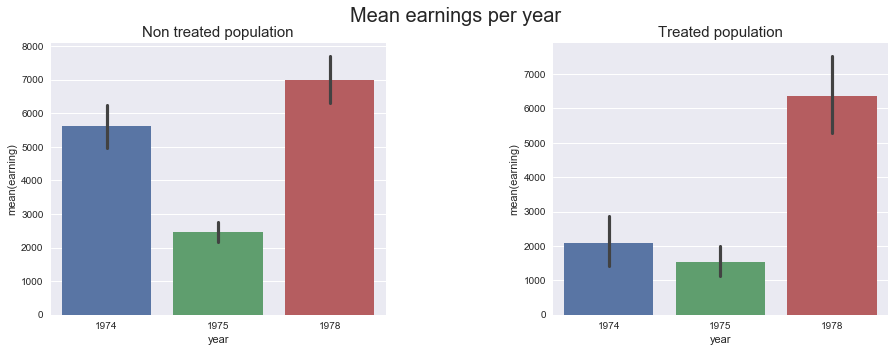

In [9]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,5), ncols=2, nrows=1)
plt.suptitle("Mean earnings per year", fontsize=20)


# Adjust the sub plots parameters
wspace =  0.5   # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)

# Set a title to each graph
ax[0].set_title("Non treated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)


# Plot the data
sns.barplot( df.loc[df.treat==0].year, df.loc[df.treat==0].earning, ax=ax[0])
sns.barplot( df.loc[df.treat==1].year, df.loc[df.treat==1].earning, ax=ax[1])

plt.show()

* This graph shows that for the treated population, the earnings after the treatment are way higher than before. For the non treated population, the difference is smaller. 
* However, this graph shows the mean of the earnings and we know that the mean is not robust and therefore is very sensitive to outliers. In our dataset, there are a lot of 0 in the earnings: that could be because the person really earned 0 for that year or maybe it is just missing data. Considering the high number of cases where the earnings are 0, we will consider that this is missing data and therefore we will now try to redraw this graph without the lines where earning is 0. 

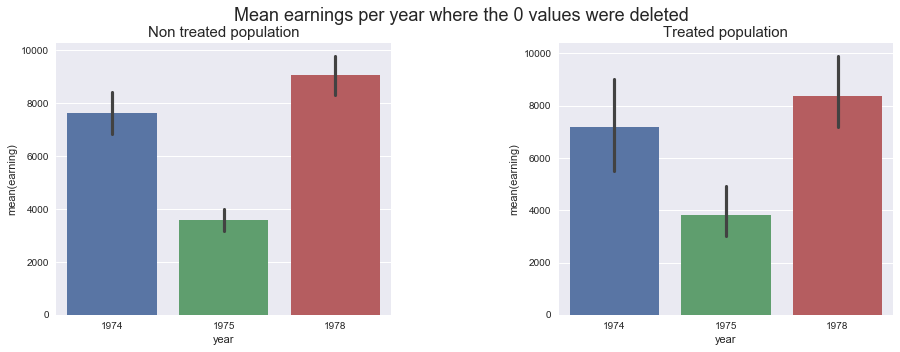

In [10]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,5), ncols=2, nrows=1)
plt.suptitle("Mean earnings per year where the 0 values were deleted", fontsize=18)


# Adjust the sub plots parameters
wspace =  0.5   # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)


# Set a title to each graph
ax[0].set_title("Non treated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)


# Plot the data
sns.barplot( df.loc[df.treat==0].loc[df.earning!=0].year, df.loc[df.treat==0].loc[df.earning!=0].earning, ax=ax[0])
sns.barplot( df.loc[df.treat==1].loc[df.earning!=0].year, df.loc[df.treat==1].loc[df.earning!=0].earning, ax= ax[1])

plt.show()

We notice that when we do not consider the values for which the earnings are 0, the results are very different. It is now more complicated to make any conclusion about the graph since both barcharts are now similar and the differences between the earnings in 78 and 75 and 74 seem to be the same for the two groups. This confirms how the mean is not robust since when we did not account for the outliers (namely 0), the means distribution completely changed. To avoid this, we can draw a boxplot instead of a barplot. 

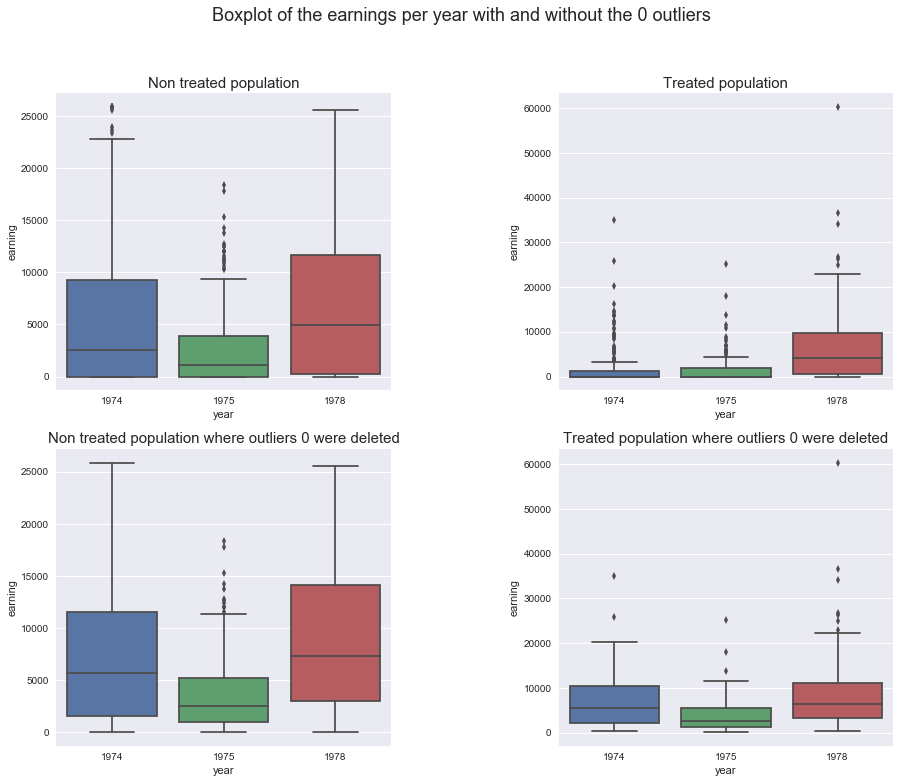

In [11]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,12), ncols=2, nrows=2)
plt.suptitle("Boxplot of the earnings per year with and without the 0 outliers", fontsize=18)


# Adjust the sub plots parameters
wspace =  0.5   # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)


# Set a title to each graph
ax[0][0].set_title("Non treated population", fontsize=15)
ax[0][1].set_title("Treated population", fontsize=15)
ax[1][0].set_title("Non treated population where outliers 0 were deleted", fontsize=15)
ax[1][1].set_title("Treated population where outliers 0 were deleted", fontsize=15)

# Plot the data

sns.boxplot( df.loc[df.treat==0].year, df.loc[df.treat==0].earning, ax=ax[0][0])
sns.boxplot( df.loc[df.treat==1].year, df.loc[df.treat==1].earning, ax= ax[0][1])
sns.boxplot( df.loc[df.treat==0].loc[df.earning!=0].year, df.loc[df.treat==0].loc[df.earning!=0].earning, ax=ax[1][0])
sns.boxplot( df.loc[df.treat==1].loc[df.earning!=0].year, df.loc[df.treat==1].loc[df.earning!=0].earning, ax= ax[1][1])

plt.show()

We see again that too many earnings equal 0 in 74 and 75 (median is almost 0 for the treated population!) so that might just be missing data and it would be better to look at the two last boxplots. However the outliers over 30000 in the treated population makes it very difficult to draw any conclusion about these graphs so we will also delete these points. 

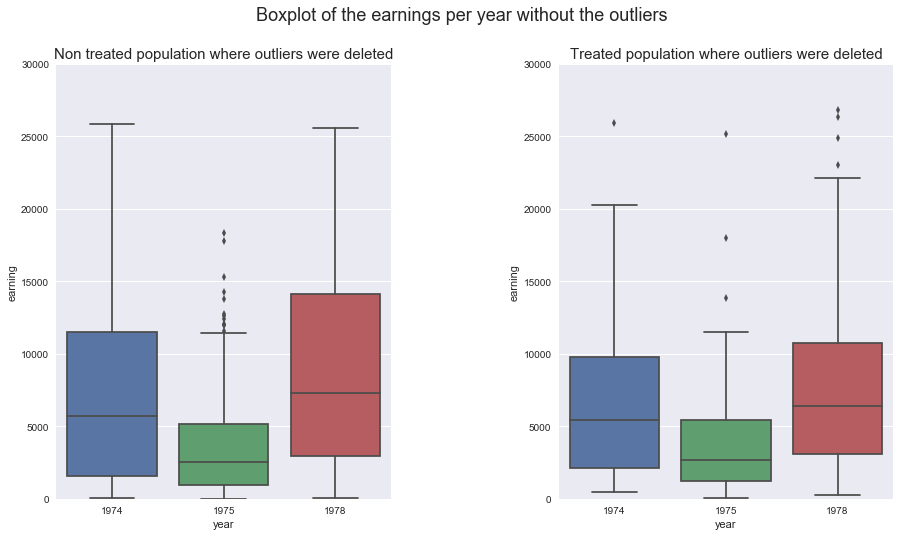

In [12]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,8), ncols=2, nrows=1)
plt.suptitle("Boxplot of the earnings per year without the outliers", fontsize=18)


# Adjust the sub plots parameters
wspace =  0.5   # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)


# Set a title to each graph

ax[0].set_title("Non treated population where outliers were deleted", fontsize=15)
ax[1].set_title("Treated population where outliers were deleted", fontsize=15)

# Plot the data

sns.boxplot( df.loc[df.treat==0].loc[df.earning!=0].year, df.loc[df.treat==0].loc[df.earning!=0].loc[df.earning<=30000].earning, ax=ax[0])
sns.boxplot( df.loc[df.treat==1].loc[df.earning!=0].year, df.loc[df.treat==1].loc[df.earning!=0].loc[df.earning<=30000].earning, ax= ax[1])
# Set the axis limits to be the same
ax[0].set(ylim=(0,30000))
ax[1].set(ylim=(0,30000))
plt.show()

- Again, it is very hard to draw any conclusion about this because the treated and non treated population have very similar boxplots. The treated population definitely has more outliers, but the 3 medians are very similar. 
- The boxes are a bit smaller for the treated population (for every year) which makes us wonder whether the treated and the untreated populations were similar before the treatment, ie. maybe the population chosen to be treated was a population whose earnings were smaller than for the untreated population. 

### 2. a closer look at the data

Let us first check what is the proportion of the population having a degree in both groups. 

In [13]:
Lalonde_df.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
id,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


In [14]:
treat = Lalonde_df.loc[Lalonde_df.treat==1].treat.count()
not_tr = Lalonde_df.loc[Lalonde_df.treat==0].treat.count()
deg_treat = Lalonde_df.loc[Lalonde_df.treat==1].loc[Lalonde_df.nodegree==0].nodegree.count() 
deg_not = Lalonde_df.loc[Lalonde_df.treat==0].loc[Lalonde_df.nodegree==0].nodegree.count()

prop_deg_treat= deg_treat/treat
prop_deg_not = deg_not/not_tr

print ( str(round(prop_deg_not*100,2)) + '% of the untreated population earned a degree whereas only ' +  str(round(prop_deg_treat*100,2)) + '% of the treated population earned one.')

40.33% of the untreated population earned a degree whereas only 29.19% of the treated population earned one.


More people from the untreated population earned a degree from school so that could influence the final results of the study as they might be more likely to have higher earnings. 
Let us now have a look at the age distribution.

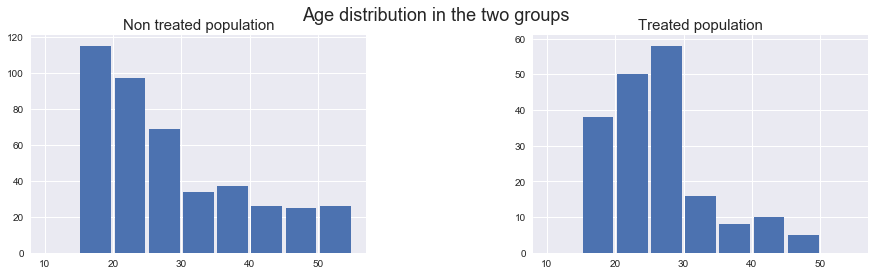

In [15]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,4), ncols=2, nrows=1)
plt.suptitle("Age distribution in the two groups", fontsize=18)


# Adjust the sub plots parameters
wspace =  0.5 # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)


# Set a title to each graph

ax[0].set_title("Non treated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)

Lalonde_df.loc[Lalonde_df.treat==0].age.hist(bins=list(range(10,60,5)), rwidth=0.9, ax=ax[0])
Lalonde_df.loc[Lalonde_df.treat==1].age.hist(bins=list(range(10,60,5)), rwidth=0.9, ax=ax[1])

plt.show()

There seems to be more young people and less 35 to 60 years old people in the treated population, which could also influence the earnings: if one of the two groups is less experienced, it is more likely that this population will earn less money and have a lower increase in their wage from one year to another. Let us now have a look at the number of years of education distribution.

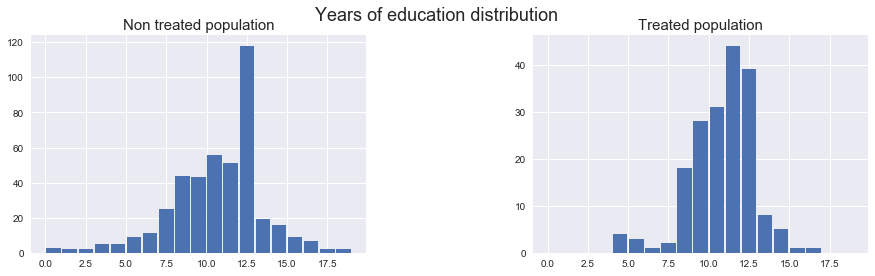

In [16]:
# Create a figure with 2 subplots and set the title
fig, ax = plt.subplots(figsize=(15,4), ncols=2, nrows=1)
plt.suptitle("Years of education distribution", fontsize=18)
fig.xticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

# Adjust the sub plots parameters
wspace =  0.5 # the amount of width reserved for white space between subplots

plt.subplots_adjust(
  wspace  =  wspace
)


# Set a title to each graph

ax[0].set_title("Non treated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)

Lalonde_df.loc[Lalonde_df.treat==0].educ.hist(bins=list(range(0,20,1)), rwidth=0.9, ax=ax[0])
Lalonde_df.loc[Lalonde_df.treat==1].educ.hist(bins=list(range(0,20,1)), rwidth=0.9, ax=ax[1])

plt.show()

Here, we can see that, again, the two distributions are very different and that can impact the results of the study: the more year of education you have, the higher your wage. 

#### To conclude on these two first analyses, one can say that, in order to be able to draw any conclusion, it is crucial to match people (treated and control) that have (at least) similar features. This is what propensity score is about: matching people who have same propensity score (ie. their features have same distribution). 

### 3. A propensity score model
We start our more refined analysis by calculating propensity scores for each data point. We do this by fitting a logistic model using pre-treatment features. In the dataset description, each subject (data point) has a race of either black, hispanic or white. In the data frame, black and hispanic are binary variables, and being white is represented by a zero in both. To make fitting more explicit, we add another binary variable, white, which gets value 1 only if both black and hispanic are 0. The propensity scores are stored in the column **prop_score**.

In [17]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
import numpy as np

# X = training vector of shape (number of samples, number of features)
# Y = Target vector relative to X with shape (number of samples) 
X=Lalonde_df.copy()

# Add 'white' as binary variable, with value 1 if 'black' and 'hispan' are both 0
# (It was specified in the dataset description that we only have black, hispanic or white 
# people, otherwise this would be named 'non-black-non-hispanic' or similar)
X['white'] = np.where((X['black'] == 0) & (X['hispan'] == 0), 1, 0)

# Propensity score must be based on the pre-treatment features
del X['treat']
del X['re78']

y=Lalonde_df.treat

logistic.fit(X,y)

pred = logistic.predict_proba(X)

# Take the first element of each propensity score, since they sum to 1
X['prop_score'] = pred[:,0]

X.head(10)

,age,educ,black,hispan,married,nodegree,re74,re75,white,prop_score
id,,,,,,,,,,
NSW1,37,11,1,0,1,1,0.0,0.0,0,0.487237
NSW2,22,9,0,1,0,1,0.0,0.0,0,0.706139
NSW3,30,12,1,0,0,0,0.0,0.0,0,0.351450
NSW4,27,11,1,0,0,1,0.0,0.0,0,0.332523
NSW5,33,8,1,0,0,1,0.0,0.0,0,0.336496
NSW6,22,9,1,0,0,1,0.0,0.0,0,0.308318
NSW7,23,12,1,0,0,0,0.0,0.0,0,0.329949
NSW8,32,11,1,0,0,1,0.0,0.0,0,0.347872
NSW9,22,16,1,0,0,0,0.0,0.0,0,0.346045


### 4. Matching based on the propensity scores
Now that each data point has a propensity score, we can match treated and untreated data points which have a similar score. To do this, we use maximum weighted matching of a network from the networkx package. In order to use network algorithms, we construct a complete bipartite graph of our data points, with the partition according to treatment status (treated or untreated). The procedure is as follows:

First, we add edges between treated and non-treated nodes (subjects), creating a complete bipartite graph (each node in one partition connected to each node in the other partition, and no edges exist within partitions).
We then use maximum weight matching to find the best **maximum cardinality matching** in the graph (maximum cardinality matching = a matching with the maximum number of edges possible).
Therefore, we set the weight of an edge between two nodes to be the **negation of the absolute value of the
difference between their propensity scores** (maximum weight matching finds matching with **maximum sum of
weights**, so we need **bigger weight to be a better match**). That is, the weight of the edge between
treated node A and untreated node B is -1 * abs(propensity score of A - propensity score of B).

In [19]:
import networkx as nx
from networkx.algorithms import bipartite

# Bipartite graph with partition according to treat variable
bg = nx.Graph()
bg.add_nodes_from(list(Lalonde_df.loc[Lalonde_df.treat == 0].index), bipartite = 0)
bg.add_nodes_from(list(Lalonde_df.loc[Lalonde_df.treat == 1].index), bipartite = 1)

top_nodes = set(n for n,d in bg.nodes(data=True) if d['bipartite']==0)
bottom_nodes = set(bg) - top_nodes

# Add edges between treated and non-treated nodes (subjects), creating a complete bipartite graph (each node in
# one partition connected to each node in the other partition, and no edges exist within partitions).
# We use maximum weight matching to find the best maximum cardinality matching in the graph.
# Therefore, we set the weight of an edge between two nodes to be the negation of the absolute value of the
# difference between their propensity scores (maximum weight matching finds matching with maximum sum of
# weights, so we need bigger weight to be a better match). That is, the weight of the edge between
# treated node A and untreated node B is -1 * abs(propensity score of A - propensity score of B).

for top_node in top_nodes:
    for bottom_node in bottom_nodes:
        bg.add_edge(top_node,bottom_node,weight=-1.0 * abs(X.loc[top_node].prop_score - X.loc[bottom_node].prop_score))

In [20]:
# Calculate maximum weight matching among all maximum cardinality matchings
best_matchings = nx.max_weight_matching(bg,maxcardinality=True)

Now we create a data frame for the matched data and check that the matching was completed successfully.

In [21]:
# Create new data frame with matchings as a feature and all non-matched data points dropped

matched_df = Lalonde_df.copy()
matched_df = matched_df.drop(set(matched_df.index)-set(best_matchings))
matched_df['match'] = ''

# Add matchings
for node in best_matchings:
    matched_df.at[node,'match'] = best_matchings[node]

# Check that everyone has a match
all_matched = True
for person in matched_df.index:
    if matched_df.loc[person].match == '':
        all_matched = False
if all_matched == False:
    print('Matched data frame contains non-matched data points!')
else:
    print('Matched data frame contains only matched data points.')

# In the matched data frame, there should be 2x data points, where x is the
# number of treated data points in the original Lalonde data frame (since
# we have fewer treated than untreated data points).
print('The number of data points in matched data frame should be %d, and it is %d.' \
      % (2*Lalonde_df.loc[Lalonde_df.treat==1].shape[0],matched_df.shape[0]))
print('There are %d treated and %d untreated data points.' \
      % (matched_df.loc[matched_df.treat == 1].shape[0],matched_df.loc[matched_df.treat == 0].shape[0]))
print('Success!')

Matched data frame contains only matched data points.
The number of data points in matched data frame should be 370, and it is 370.
There are 185 treated and 185 untreated data points.
Success!


We look at some propensity scores to make sure the matching makes sense. We also look at the matched data frame, where the column _match_ shows the match of each data point.

We find that most matched data points seem to have a very close match with respect to propensity score. However, there are some points where the propensity scores are somewhat different.

In [22]:
# Look at some propensity scores to make sure they make sense
for ii in matched_df.head(10).index:
    print('Treated person '+ii\
          +' with propensity score %.3f matched with untreated person ' % (X.loc[ii].prop_score)\
          +str(matched_df.loc[ii].match)+' with propensity score %.3f.' % (X.loc[matched_df.loc[ii].match].prop_score))

Treated person NSW1 with propensity score 0.487 matched with untreated person PSID208 with propensity score 0.845.
Treated person NSW2 with propensity score 0.706 matched with untreated person PSID384 with propensity score 0.709.
Treated person NSW3 with propensity score 0.351 matched with untreated person PSID399 with propensity score 0.352.
Treated person NSW4 with propensity score 0.333 matched with untreated person PSID141 with propensity score 0.842.
Treated person NSW5 with propensity score 0.336 matched with untreated person PSID234 with propensity score 0.343.
Treated person NSW6 with propensity score 0.308 matched with untreated person PSID231 with propensity score 0.309.
Treated person NSW7 with propensity score 0.330 matched with untreated person PSID402 with propensity score 0.847.
Treated person NSW8 with propensity score 0.348 matched with untreated person PSID400 with propensity score 0.349.
Treated person NSW9 with propensity score 0.346 matched with untreated person PS

In [23]:
matched_df.head()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,match
id,,,,,,,,,,,
NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460,PSID208
NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940,PSID384
NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500,PSID399
NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460,PSID141
NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899,PSID234


In [24]:
matched_df.tail()

,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78,match
id,,,,,,,,,,,
PSID423,0,27,10,1,0,0,1,0.0,0.0,7543.7940,NSW77
PSID425,0,18,11,0,0,0,1,0.0,0.0,10150.5000,NSW49
PSID426,0,24,1,0,1,1,1,0.0,0.0,19464.6100,NSW121
PSID428,0,32,5,1,0,1,1,0.0,0.0,187.6713,NSW126
PSID429,0,16,9,0,0,0,1,0.0,0.0,1495.4590,NSW164


We compare the outcome (1978 earnings) between treated and untreated subjects in the matched data. It seems that the outcome is slightly higher for the treated subjects, but the difference is quite small.

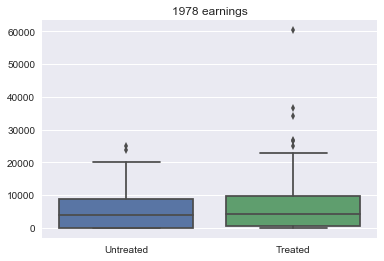

In [25]:
# Outcome
sns.boxplot(matched_df.treat, matched_df.re78)
plt.gca().set_title('1978 earnings')
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.xticks([0,1],('Untreated','Treated'))
plt.show()

We compare the distributions of features between the treated and untreated subjects in the matched data. We see that most features have similar distributions, but race (black, hispanic, white) and age features have quite a lot of dissimilarity. This is problematic since race probably has an effect on earnings (data is from 1970's), as does subject age. Therefore, we are probably closer to drawing valid conclusions than before, but additional balancing is needed to eliminate the effects of differences in race and age distributions.

In the matched data:

Of the treated subjects, 84.3 % are blacks, 5.9 % are hispanics, and 9.7 % are whites.
Of the untreated subjects, 47.0 % are blacks, 25.4 % are hispanics, and 27.6 % are whites.
Of the treated subjects, 70.8 % have no school degree.
Of the untreated subjects, 71.4 % have no school degree.
Of the treated subjects, 18.9 % are married.
Of the untreated subjects, 24.3 % are married.


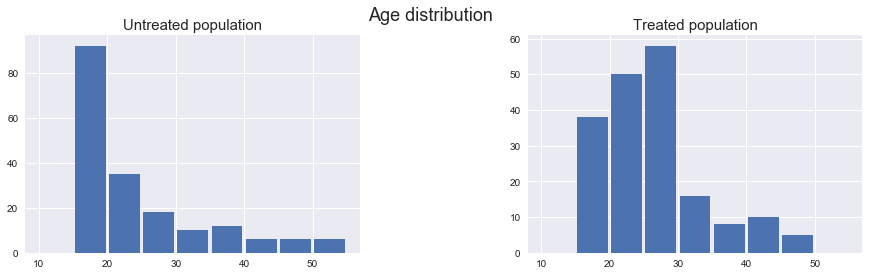

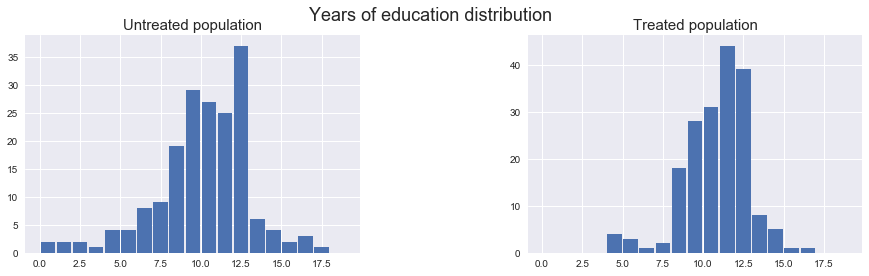

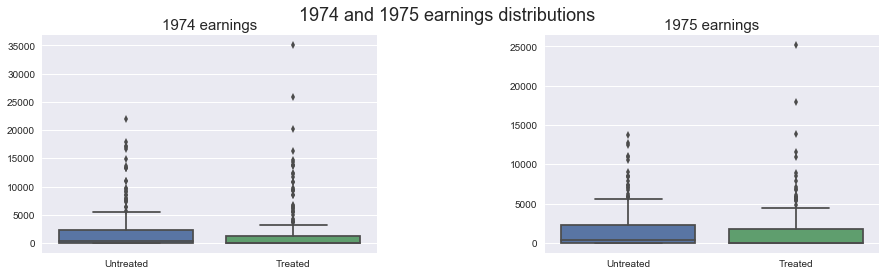

In [26]:
# Other features

treated_all = matched_df.loc[matched_df.treat == 1].shape[0]

treated_blacks = matched_df.loc[matched_df.treat == 1].black.sum()
treated_hispans = matched_df.loc[matched_df.treat == 1].hispan.sum()
treated_whites = treated_all-treated_blacks-treated_hispans

untreated_all = matched_df.loc[matched_df.treat == 0].shape[0]

untreated_blacks = matched_df.loc[matched_df.treat == 0].black.sum()
untreated_hispans = matched_df.loc[matched_df.treat == 0].hispan.sum()
untreated_whites = untreated_all-untreated_blacks-untreated_hispans

treated_nodegrees = matched_df.loc[matched_df.treat == 1].nodegree.sum()
untreated_nodegrees = matched_df.loc[matched_df.treat == 0].nodegree.sum()

treated_married = matched_df.loc[matched_df.treat == 1].married.sum()
untreated_married = matched_df.loc[matched_df.treat == 0].married.sum()


print('In the matched data:\n')
print('Of the treated subjects, %.1f %% are blacks, %.1f %% are hispanics, and %.1f %% are whites.' \
     % (float(treated_blacks)*100/treated_all,float(treated_hispans)*100/treated_all, \
        float(treated_whites)*100/treated_all))
print('Of the untreated subjects, %.1f %% are blacks, %.1f %% are hispanics, and %.1f %% are whites.' \
     % (float(untreated_blacks)*100/untreated_all,float(untreated_hispans)*100/untreated_all, \
        float(untreated_whites)*100/untreated_all))
print('Of the treated subjects, %.1f %% have no school degree.' % (float(treated_nodegrees)*100/treated_all))
print('Of the untreated subjects, %.1f %% have no school degree.' % (float(untreated_nodegrees)*100/treated_all))
print('Of the treated subjects, %.1f %% are married.' % (float(treated_married)*100/treated_all))
print('Of the untreated subjects, %.1f %% are married.' % (float(untreated_married)*100/treated_all))

fig, ax = plt.subplots(figsize=(15,4), ncols=2, nrows=1)
plt.suptitle("Age distribution", fontsize=18)
wspace =  0.5
plt.subplots_adjust(wspace  =  wspace)
ax[0].set_title("Untreated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)
matched_df.loc[matched_df.treat==0].age.hist(bins=list(range(10,60,5)), rwidth=0.9, ax=ax[0])
matched_df.loc[matched_df.treat==1].age.hist(bins=list(range(10,60,5)), rwidth=0.9, ax=ax[1])

fig, ax = plt.subplots(figsize=(15,4), ncols=2, nrows=1)
plt.suptitle("Years of education distribution", fontsize=18)
wspace =  0.5
plt.subplots_adjust(wspace  =  wspace)
ax[0].set_title("Untreated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)
matched_df.loc[matched_df.treat==0].educ.hist(bins=list(range(0,20,1)), rwidth=0.9, ax=ax[0])
matched_df.loc[matched_df.treat==1].educ.hist(bins=list(range(0,20,1)), rwidth=0.9, ax=ax[1])

fig, ax = plt.subplots(figsize=(15,4), ncols=2, nrows=1)
plt.suptitle("1974 and 1975 earnings distributions", fontsize=18)
wspace =  0.5
plt.subplots_adjust(wspace  =  wspace)
ax[0].set_title("1974 earnings", fontsize=15)
ax[1].set_title("1975 earnings", fontsize=15)
sns.boxplot(matched_df.treat, matched_df.re74,ax=ax[0])
sns.boxplot(matched_df.treat,matched_df.re75,ax=ax[1])
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.xticks([0,1],('Untreated','Treated'))
plt.sca(ax[0])
plt.xticks([0,1],('Untreated','Treated'))

plt.show()

### 5. Further balancing

We see that after matching, the treated and untreated group are quite well balanced with respect to all other features except race and age.

The imbalance in the race variable is probably problematic since race could affect salary quite a lot, especially in the '70s where this data is from. Therefore, we improve our matching by creating the matching so that only blacks are matched with blacks, hispanics with hispanics and whites with whites. This is done by creating our bipartite graph so that only edges between subjects of the same race are possible. The requirement comes at the cost of the maximum cardinality of a matching being smaller than before (since we force the race distributions to be the same in treated and untreated groups, some treated subjects cannot be matched). This means that we will have fewer matched data points than before. The decrease is acceptable since we are still left with a good amount of data (232 data points).

In [27]:
improved_bg = nx.Graph()
improved_bg.add_nodes_from(list(Lalonde_df.loc[Lalonde_df.treat == 0].index), bipartite = 0)
improved_bg.add_nodes_from(list(Lalonde_df.loc[Lalonde_df.treat == 1].index), bipartite = 1)

top_nodes = set(n for n,d in bg.nodes(data=True) if d['bipartite']==0)
bottom_nodes = set(bg) - top_nodes

for top_node in top_nodes:
    for bottom_node in bottom_nodes:
        if Lalonde_df.loc[top_node].black == Lalonde_df.loc[bottom_node].black and Lalonde_df.loc[top_node].hispan == Lalonde_df.loc[bottom_node].hispan:
            improved_bg.add_edge(top_node,bottom_node,weight=-1.0 * abs(X.loc[top_node].prop_score - X.loc[bottom_node].prop_score))
            
improved_best_matchings = nx.max_weight_matching(improved_bg,maxcardinality=True)

In [28]:
improved_matched_df = Lalonde_df.copy()
improved_matched_df = improved_matched_df.drop(set(improved_matched_df.index)-set(improved_best_matchings))
improved_matched_df['match'] = ''

for node in improved_best_matchings:
    improved_matched_df.at[node,'match'] = improved_best_matchings[node]

# Check that everyone has a match
all_matched = True
for person in improved_matched_df.index:
    if improved_matched_df.loc[person].match == '':
        all_matched = False
if all_matched == False:
    print('Matched data frame contains non-matched data points!')
else:
    print('Matched data frame contains only matched data points.')
    
print('The number of data points in matched data frame is %d.' \
      % (improved_matched_df.shape[0]))
print('There are %d treated and %d untreated data points.' \
      % (improved_matched_df.loc[improved_matched_df.treat == 1].shape[0],improved_matched_df.loc[improved_matched_df.treat == 0].shape[0]))
print('Success!')

Matched data frame contains only matched data points.
The number of data points in matched data frame is 232.
There are 116 treated and 116 untreated data points.
Success!


We look at the feature distributions of our improved matching (comments after the plots).

In the matched data:

Of the treated subjects, 75.0 % are blacks, 9.5 % are hispanics, and 15.5 % are whites.
Of the untreated subjects, 75.0 % are blacks, 9.5 % are hispanics, and 15.5 % are whites.
Of the treated subjects, 68.1 % have no school degree.
Of the untreated subjects, 63.8 % have no school degree.
Of the treated subjects, 24.1 % are married.
Of the untreated subjects, 27.6 % are married.


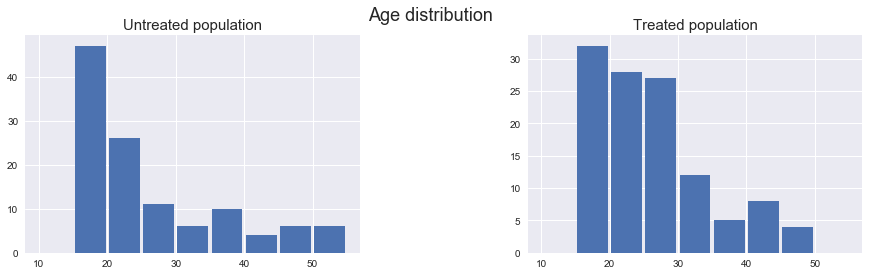

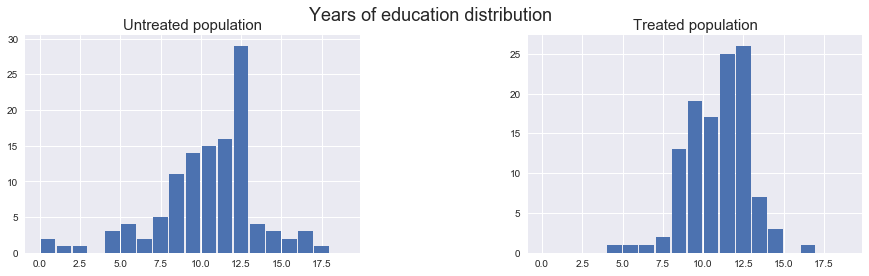

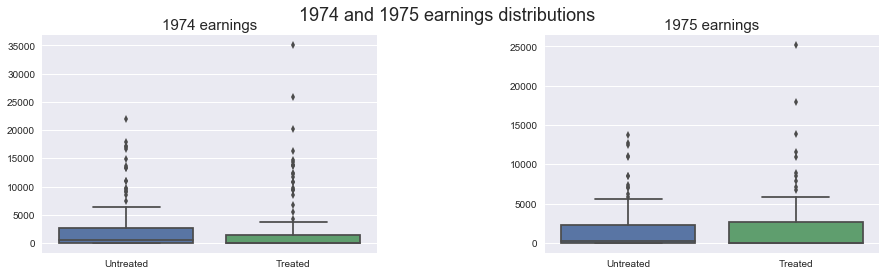

In [29]:
# Other features

treated_all = improved_matched_df.loc[improved_matched_df.treat == 1].shape[0]

treated_blacks = improved_matched_df.loc[improved_matched_df.treat == 1].black.sum()
treated_hispans = improved_matched_df.loc[improved_matched_df.treat == 1].hispan.sum()
treated_whites = treated_all-treated_blacks-treated_hispans

untreated_all = improved_matched_df.loc[improved_matched_df.treat == 0].shape[0]

untreated_blacks = improved_matched_df.loc[improved_matched_df.treat == 0].black.sum()
untreated_hispans = improved_matched_df.loc[improved_matched_df.treat == 0].hispan.sum()
untreated_whites = untreated_all-untreated_blacks-untreated_hispans

treated_nodegrees = improved_matched_df.loc[improved_matched_df.treat == 1].nodegree.sum()
untreated_nodegrees = improved_matched_df.loc[improved_matched_df.treat == 0].nodegree.sum()

treated_married = improved_matched_df.loc[improved_matched_df.treat == 1].married.sum()
untreated_married = improved_matched_df.loc[improved_matched_df.treat == 0].married.sum()


print('In the matched data:\n')
print('Of the treated subjects, %.1f %% are blacks, %.1f %% are hispanics, and %.1f %% are whites.' \
     % (float(treated_blacks)*100/treated_all,float(treated_hispans)*100/treated_all, \
        float(treated_whites)*100/treated_all))
print('Of the untreated subjects, %.1f %% are blacks, %.1f %% are hispanics, and %.1f %% are whites.' \
     % (float(untreated_blacks)*100/untreated_all,float(untreated_hispans)*100/untreated_all, \
        float(untreated_whites)*100/untreated_all))
print('Of the treated subjects, %.1f %% have no school degree.' % (float(treated_nodegrees)*100/treated_all))
print('Of the untreated subjects, %.1f %% have no school degree.' % (float(untreated_nodegrees)*100/treated_all))
print('Of the treated subjects, %.1f %% are married.' % (float(treated_married)*100/treated_all))
print('Of the untreated subjects, %.1f %% are married.' % (float(untreated_married)*100/treated_all))

fig, ax = plt.subplots(figsize=(15,4), ncols=2, nrows=1)
plt.suptitle("Age distribution", fontsize=18)
wspace =  0.5
plt.subplots_adjust(wspace  =  wspace)
ax[0].set_title("Untreated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)
improved_matched_df.loc[improved_matched_df.treat==0].age.hist(bins=list(range(10,60,5)), rwidth=0.9, ax=ax[0])
improved_matched_df.loc[improved_matched_df.treat==1].age.hist(bins=list(range(10,60,5)), rwidth=0.9, ax=ax[1])

fig, ax = plt.subplots(figsize=(15,4), ncols=2, nrows=1)
plt.suptitle("Years of education distribution", fontsize=18)
wspace =  0.5
plt.subplots_adjust(wspace  =  wspace)
ax[0].set_title("Untreated population", fontsize=15)
ax[1].set_title("Treated population", fontsize=15)
improved_matched_df.loc[improved_matched_df.treat==0].educ.hist(bins=list(range(0,20,1)), rwidth=0.9, ax=ax[0])
improved_matched_df.loc[improved_matched_df.treat==1].educ.hist(bins=list(range(0,20,1)), rwidth=0.9, ax=ax[1])

fig, ax = plt.subplots(figsize=(15,4), ncols=2, nrows=1)
plt.suptitle("1974 and 1975 earnings distributions", fontsize=18)
wspace =  0.5
plt.subplots_adjust(wspace  =  wspace)
ax[0].set_title("1974 earnings", fontsize=15)
ax[1].set_title("1975 earnings", fontsize=15)
sns.boxplot(improved_matched_df.treat, improved_matched_df.re74,ax=ax[0])
sns.boxplot(improved_matched_df.treat,improved_matched_df.re75,ax=ax[1])
ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_xlabel('')
ax[1].set_xlabel('')
plt.xticks([0,1],('Untreated','Treated'))
plt.sca(ax[0])
plt.xticks([0,1],('Untreated','Treated'))

plt.show()

We see that **all features are very nicely balanced** (unlike in part 4). The race distributions are exactly equal between treated and untreated groups (naturally, since we explicitly enforced this), and also the age distributions are much more similar than in part 4 (a decreasing trend with increasing age in both). This matching is therefore more balanced than the one in part 4.

### 6. Comparison of improved matched data
We compare the outcome of the unterated and treated subjects from the improved matched data set from part 5.

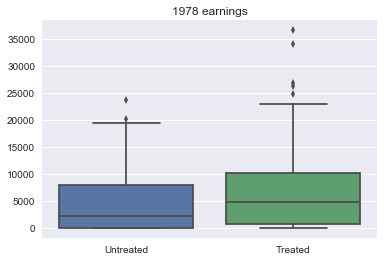

In [30]:
# Outcome
sns.boxplot(improved_matched_df.treat, improved_matched_df.re78)
plt.gca().set_title('1978 earnings')
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')
plt.xticks([0,1],('Untreated','Treated'))
plt.show()

After proper matching, which included rational balancing with respect to race, we see that the 1978 earnings are higher for the treated group than for the untreated group. We conclude that the job training programme is effective to some degree (the median earning is increased by a few thousand). However, we matched under the assumption that only observed variables determine treatment probability (naive model), so this result needs to be taken with a pinch of salt.

(Strictly speaking, we matched on propensity scores, which are defined even if the naive model is not true, but our conclusion about the effectiveness of the programme is based on the idea that people with similar propensity scores have similar probabilities to treat. If this assumption is accepted, then we can say that the programme is effective as it increases the median income by some thousands.)

## Applied ML

In [141]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [65]:
remove = ('headers', 'footers', 'quotes')

In [66]:
dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=12)

In [67]:
len(dataset.data)

18846

In [68]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
vectorized_dataset = vectorizer.fit_transform(dataset.data)

In [74]:
vectorized_dataset.shape

(18846, 173446)

In [75]:
x_train, x_rest, y_train, y_rest = train_test_split(vectorized_dataset, dataset.target, test_size = 0.2)
print(x_train.shape, x_rest.shape, y_train.shape, y_rest.shape)

(15076, 173446) (3770, 173446) (15076,) (3770,)


In [76]:
x_validation, x_test, y_validation, y_test = train_test_split(x_rest, y_rest, test_size = 0.5)

In [126]:
def grid_search_rf(start_depth, end_depth, step_depth, min_estimators, max_estimators, step_estimators):
    results = dict()
    iters = (int((end_depth - start_depth)/step_depth) + 1) * (int((max_estimators - min_estimators)/step_estimators) + 1)
    ind = 0
    for depth in range(start_depth, end_depth+1, step_depth):
        for n_estimator in range(min_estimators, max_estimators+1, step_estimators):
            random_forest = RandomForestClassifier(max_depth=depth, n_estimators=n_estimator, random_state=0)

            random_forest.fit(x_train, y_train)
            pred = random_forest.predict(x_validation)
            score = metrics.accuracy_score(y_validation, pred)
            results[ind] = {'max_depth' : depth, 'n_estimators' : n_estimator, 'accuracy' : score}
            print("{0}/{1} iteration\t depth: {2}\t n_estimators: {3}\t accuracy: {4}"
                  .format(ind + 1, iters, depth, n_estimator, score))
            ind = ind + 1
    return pd.DataFrame.from_dict(results, orient='index')

In [127]:
results = grid_search_rf(1, 30, 3, 100, 2000, 400)

1/50 iteration	 depth: 1	 n_estimators: 100	 accuracy: 0.33421750663129973
2/50 iteration	 depth: 1	 n_estimators: 500	 accuracy: 0.5061007957559682
3/50 iteration	 depth: 1	 n_estimators: 900	 accuracy: 0.5151193633952255
4/50 iteration	 depth: 1	 n_estimators: 1300	 accuracy: 0.5151193633952255
5/50 iteration	 depth: 1	 n_estimators: 1700	 accuracy: 0.5119363395225465
6/50 iteration	 depth: 4	 n_estimators: 100	 accuracy: 0.5745358090185676
7/50 iteration	 depth: 4	 n_estimators: 500	 accuracy: 0.6912466843501326
8/50 iteration	 depth: 4	 n_estimators: 900	 accuracy: 0.6960212201591512
9/50 iteration	 depth: 4	 n_estimators: 1300	 accuracy: 0.7082228116710876
10/50 iteration	 depth: 4	 n_estimators: 1700	 accuracy: 0.709814323607427
11/50 iteration	 depth: 7	 n_estimators: 100	 accuracy: 0.6663129973474801
12/50 iteration	 depth: 7	 n_estimators: 500	 accuracy: 0.753315649867374
13/50 iteration	 depth: 7	 n_estimators: 900	 accuracy: 0.753315649867374
14/50 iteration	 depth: 7	 n_est

In [122]:
results_df

,max_depth,n_estimators,accuracy
0,2,100,0.481167
1,2,300,0.580902
2,2,500,0.619629
3,2,700,0.623342
4,2,900,0.623873
5,2,1100,0.628117
6,2,1300,0.635013
7,2,1500,0.635544
8,2,1700,0.634483
9,2,1900,0.637135


<a list of 35 text.Text objects>

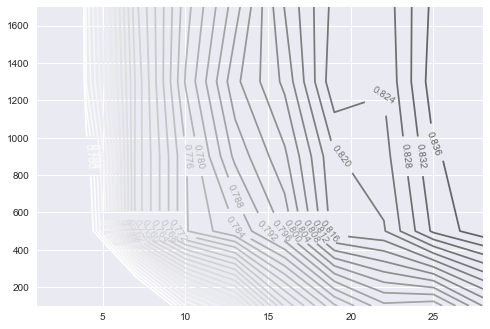

In [136]:
plt.figure()
cs = plt.contour(results.max_depth.values.reshape(10, 5), results.n_estimators.values.reshape(10, 5),
            results.accuracy.values.reshape(10, 5), np.linspace(0.7, 0.9, 51))
plt.clabel(cs, inline=1, fontsize=10)

In [154]:
random_forest = RandomForestClassifier(max_depth=35, n_estimators=1700, random_state=0)

random_forest.fit(x_train, y_train)
val_pred = random_forest.predict(x_validation)
val_score = metrics.accuracy_score(y_validation, val_pred)
test_pred = random_forest.predict(x_test)
test_score = metrics.accuracy_score(y_test, test_pred)
print('Validation score: {0}\t test score: {1}'.format(val_score, test_score))

Validation score: 0.849867374005305	 test score: 0.830238726790451


In [155]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


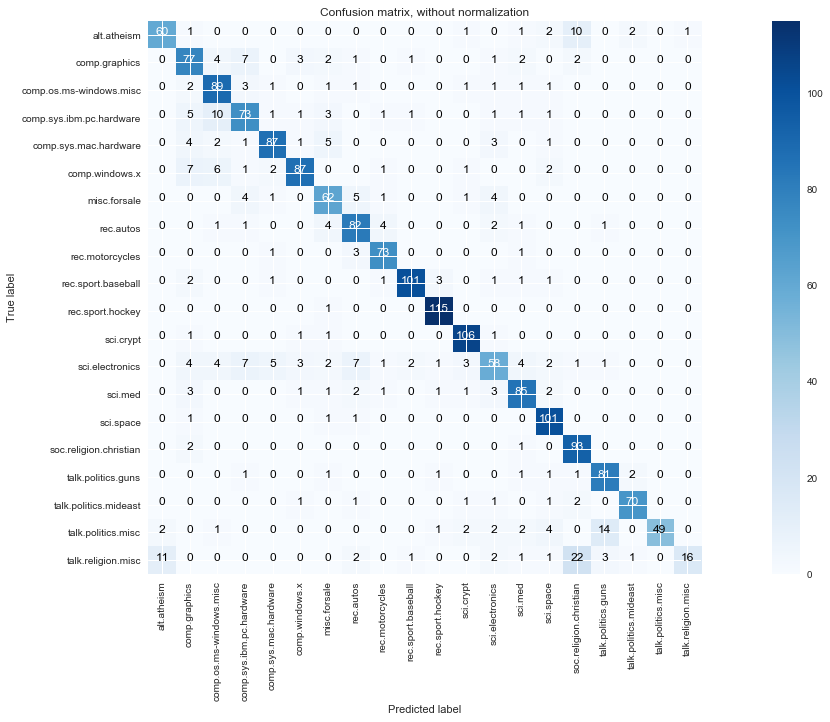

In [156]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, classes=dataset.target_names,
                      title='Confusion matrix, without normalization')
plt.show()

In [157]:
random_forest.feature_importances_

array([  4.34e-04,   1.98e-04,   1.39e-06, ...,   0.00e+00,   0.00e+00,
         9.23e-09])

In [159]:
indicies_feature = np.argsort(random_forest.feature_importances_)

array([ 86722,  67120,  67119, ...,  55427,  65617, 139364])

In [194]:
top20 = indicies_feature[-1:-21:-1]
labels = np.array(vectorizer.get_feature_names())[top20]
values = random_forest.feature_importances_[top20]

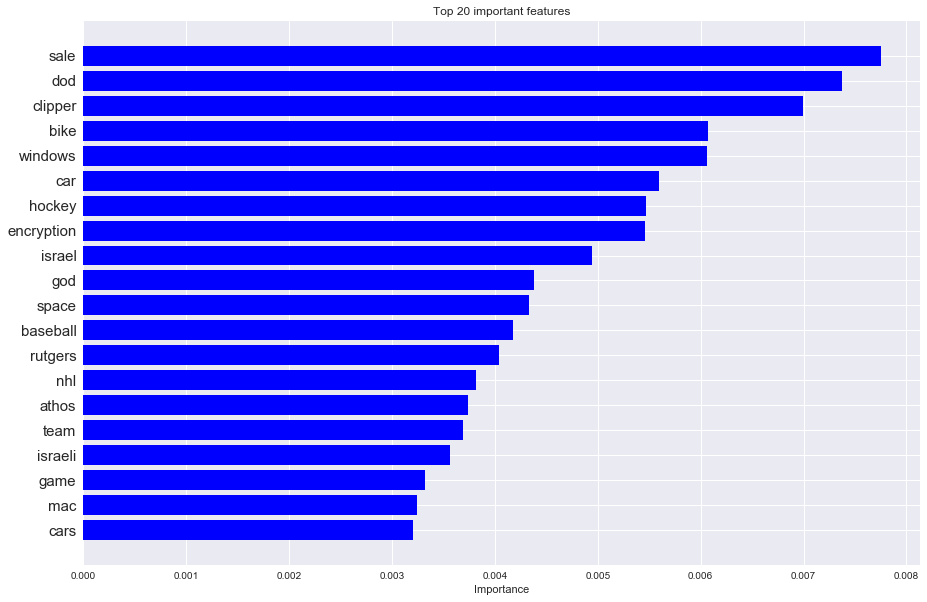

In [203]:
fig, ax = plt.subplots(figsize=(15,10))

y_pos = np.arange(len(labels))

ax.barh(y_pos, values, align='center', color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, size = 15)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Importance')
ax.set_title('Top 20 important features')

plt.show()
